# Gathering Data

In [107]:
import tweepy
import requests
import pandas as pd
import json
import time
import math
import re
import numpy as np

In [2]:
# Importing the Twitter archive CSV file into a DataFrame
arc_df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# Downloading the  tweet image predictions TSV using the Requests library to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Importing the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Declaring Twitter API keys and access tokens
consumer_key = 'o0qA**UDACITY**pB1mKH'
consumer_secret = 'NYnmI3P*TOLD***ME***TO**fyT4xQolNZjfYdaQ'
access_token = '252476-tns**CHANGE**THESE**3FWyjmZ6LdourU8'
access_secret = 'LZeGEkYS****VALUES*****u7XZju2mg9UlKUOY'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [6]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

start = time.time() # start timer

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = arc_df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

318# 834786237630337024
319# 834574053763584002
320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 834089966724603904
325# 834086379323871233
326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 83009740037

651# 792883833364439040
652# 792773781206999040
653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 791780927877898241
658# 791774931465953280
659# 791672322847637504
660# 791406955684368384
661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 78732244394

Rate limit reached. Sleeping for: 96


796# 773308824254029826
797# 773247561583001600
798# 773191612633579521
799# 772877495989305348
800# 772826264096874500
801# 772615324260794368
802# 772581559778025472
803# 772193107915964416
804# 772152991789019136
805# 772117678702071809
806# 772114945936949249
807# 772102971039580160
808# 771908950375665664
809# 771770456517009408
810# 771500966810099713
811# 771380798096281600
812# 771171053431250945
813# 771136648247640064
814# 771102124360998913
815# 771014301343748096
816# 771004394259247104
817# 770787852854652928
818# 770772759874076672
819# 770743923962707968
770743923962707968: No status found with that ID.

820# 770655142660169732
821# 770414278348247044
822# 770293558247038976
823# 770093767776997377
824# 770069151037685760
825# 769940425801170949
826# 769695466921623552
827# 769335591808995329
828# 769212283578875904
829# 768970937022709760
830# 768909767477751808
831# 768855141948723200
832# 768609597686943744
833# 768596291618299904
834# 768554158521745409
835# 76847385

1128# 729838605770891264
1129# 729823566028484608
1130# 729463711119904772
1131# 729113531270991872
1132# 728986383096946689
1133# 728760639972315136
1134# 728751179681943552
1135# 728653952833728512
1136# 728409960103686147
1137# 728387165835677696
1138# 728046963732717569
1139# 728035342121635841
1140# 728015554473250816
1141# 727685679342333952
1142# 727644517743104000
1143# 727524757080539137
1144# 727314416056803329
1145# 727286334147182592
1146# 727175381690781696
1147# 727155742655025152
1148# 726935089318363137
1149# 726887082820554753
1150# 726828223124897792
1151# 726224900189511680
1152# 725842289046749185
1153# 725786712245440512
1154# 725729321944506368
1155# 725458796924002305
1156# 724983749226668032
1157# 724771698126512129
1158# 724405726123311104
1159# 724049859469295616
1160# 724046343203856385
1161# 724004602748780546
1162# 723912936180330496
1163# 723688335806480385
1164# 723673163800948736
1165# 723179728551723008
1166# 722974582966214656
1167# 722613351520608256


1456# 695409464418041856
1457# 695314793360662529
1458# 695095422348574720
1459# 695074328191332352
1460# 695064344191721472
1461# 695051054296211456
1462# 694925794720792577
1463# 694905863685980160
1464# 694669722378485760
1465# 694356675654983680
1466# 694352839993344000
1467# 694342028726001664
1468# 694329668942569472
1469# 694206574471057408
1470# 694183373896572928
1471# 694001791655137281
1472# 693993230313091072
1473# 693942351086120961
1474# 693647888581312512
1475# 693644216740769793
1476# 693642232151285760
1477# 693629975228977152
1478# 693622659251335168
1479# 693590843962331137
1480# 693582294167244802
1481# 693486665285931008
1482# 693280720173801472
1483# 693267061318012928
1484# 693262851218264065
1485# 693231807727280129
1486# 693155686491000832
1487# 693109034023534592
1488# 693095443459342336
1489# 692919143163629568
1490# 692905862751522816
1491# 692901601640583168
1492# 692894228850999298
1493# 692828166163931137
1494# 692752401762250755
1495# 692568918515392513


Rate limit reached. Sleeping for: 94


1696# 681261549936340994
1697# 681242418453299201
1698# 681231109724700672
1699# 681193455364796417
1700# 680970795137544192
1701# 680959110691590145
1702# 680940246314430465
1703# 680934982542561280
1704# 680913438424612864
1705# 680889648562991104
1706# 680836378243002368
1707# 680805554198020098
1708# 680801747103793152
1709# 680798457301471234
1710# 680609293079592961
1711# 680583894916304897
1712# 680497766108381184
1713# 680494726643068929
1714# 680473011644985345
1715# 680440374763077632
1716# 680221482581123072
1717# 680206703334408192
1718# 680191257256136705
1719# 680176173301628928
1720# 680161097740095489
1721# 680145970311643136
1722# 680130881361686529
1723# 680115823365742593
1724# 680100725817409536
1725# 680085611152338944
1726# 680070545539371008
1727# 680055455951884288
680055455951884288: No status found with that ID.

1728# 679877062409191424
1729# 679872969355714560
1730# 679862121895714818
1731# 679854723806179328
1732# 679844490799091713
1733# 679828447187857408

2022# 672082170312290304
2023# 672068090318987265
2024# 671896809300709376
2025# 671891728106971137
2026# 671882082306625538
2027# 671879137494245376
2028# 671874878652489728
2029# 671866342182637568
2030# 671855973984772097
2031# 671789708968640512
2032# 671768281401958400
2033# 671763349865160704
2034# 671744970634719232
2035# 671743150407421952
2036# 671735591348891648
2037# 671729906628341761
2038# 671561002136281088
2039# 671550332464455680
2040# 671547767500775424
2041# 671544874165002241
2042# 671542985629241344
2043# 671538301157904385
2044# 671536543010570240
2045# 671533943490011136
2046# 671528761649688577
2047# 671520732782923777
2048# 671518598289059840
2049# 671511350426865664
2050# 671504605491109889
2051# 671497587707535361
2052# 671488513339211776
2053# 671486386088865792
2054# 671485057807351808
2055# 671390180817915904
2056# 671362598324076544
2057# 671357843010908160
2058# 671355857343524864
2059# 671347597085433856
2060# 671186162933985280
2061# 671182547775299584


2350# 666051853826850816
2351# 666050758794694657
2352# 666049248165822465
2353# 666044226329800704
2354# 666033412701032449
2355# 666029285002620928
2356# 666020888022790149
Valid tweets: 2333
Error tweets: 23
0.037907352272669476


In [10]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

# Assessing Data

In [12]:
arc_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from your fav holiday squad! 🎉 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441...,12,10,None,None,None,pupper,None
171,858860390427611136,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Winston. He knows he's a l...,8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,None,None,None,None


arc_df (Twitter archive) columns:

* **tweet_id**: Unique identifier for each tweet
* **in_reply_to_status_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
* **in_reply_to_user_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
* **timestamp**: Timestamp when this Tweet was created
* **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
* **text**: Actual text of the status update
* **retweeted_status_id**: If the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
* **retweeted_status_user_id**: If the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
* **retweeted_status_timestamp**: Timestamp of retweet
* **expanded_urls**: tweet URL
* **rating_numerator**: Numerator of the rating of a dog. Note: ratings almost always greater than 10
* **rating_denominator**: Fenominator of the rating of a dog. Note: ratings almost always have a denominator of 10
* **name**: name of the dog
* **doggo**: Dog Stage 
* **floofer**:Dog Stage 
* **pupper**: Dog Stage 
* **puppo**: Dog Stage 

In [14]:

arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# Checking if there are any records in arc_df which are retweets
len(arc_df[arc_df.retweeted_status_id.isnull() == False])

181

In [16]:
# Checking if there are any records in arc_df whose corresponding record with same tweet_id is missing in img_df table
len(arc_df[~arc_df.tweet_id.isin(img_df.tweet_id)])

281

In [17]:
# Sorting by rating_denominator values
arc_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [18]:
# Sorting by rating_numerator values
arc_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [19]:
arc_df.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [20]:
# Number of records whose both doggo and floofer columns are not None
len(arc_df[(arc_df.doggo != 'None') & (arc_df.floofer != 'None')])

1

In [21]:
# Number of records whose both doggo and pupper columns are not None
len(arc_df[(arc_df.doggo != 'None') & (arc_df.pupper != 'None')])

12

In [22]:
# Number of records whose both doggo and pupper columns are not None
len(arc_df[(arc_df.doggo != 'None') & (arc_df.puppo != 'None')])

1

In [23]:
# Number of records whose both floofer and pupper columns are not None
len(arc_df[(arc_df.floofer != 'None') & (arc_df.pupper != 'None')])

0

In [24]:
# Number of records whose both floofer and puppo columns are not None
len(arc_df[(arc_df.floofer != 'None') & (arc_df.puppo != 'None')])

0

In [25]:
# Number of records whose both pupper and puppo columns are not None
len(arc_df[(arc_df.pupper != 'None') & (arc_df.puppo != 'None')])

0

In [26]:
img_df.sample(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False



img_df (tweet image predictions) columns:

* **tweet_id**: the unique identifier for each tweet
* **jpg_url**: dog's image URL
* **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
* **p1**: algorithm's #1 prediction for the image in the tweet
* **p1_conf**: how confident the algorithm is in its #1 prediction
* **p1_dog**: whether or not the #1 prediction is a breed of dog
* **p2**: algorithm's #2 prediction for the image in the tweet
* **p2_conf**: how confident the algorithm is in its #2 prediction
* **p2_dog**: whether or not the #2 prediction is a breed of dog
* **p3**: algorithm's #3 prediction for the image in the tweet
* **p3_conf**: how confident the algorithm is in its #3 prediction
* **p3_dog**: whether or not the #3 prediction is a breed of dog

In [27]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality

arc_df (Twitter archive) table
* contains retweets and therefore, duplicates
* many tweet_id(s) of arc_df table are missing in img_df (image predictions) table
* erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp columns)
* unnecessary html tags in source column in place of utility name 
* text column contains untruncated text instead of displayable text
* rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176)
* rating_denominator column has values other than 10
* erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)
* some records have more than one dog stage

## Tidiness

* arc_df without any duplicates (i.e. retweets) will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped
* doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"
* "breed" column should be added in arc_df table; its values based on p1_conf and p1_dog columns of img_df (image predictions) table
* retweet_count and favorite_count columns from status_df (tweet status) table should be joined with arc_df table

# Cleaning Data

In [28]:
# Taking a copy of arc_df on which the cleaning tasks will be performed
archive_clean = arc_df.copy()

### Quality

**arc_df: contains retweets and therefore, duplicates**

### Define 

Keep only those rows in arc_df table that are original tweets and NOT retweets (i.e. retweeted_status_id column is null). Delete the rest.

### Code

In [29]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

### Test

In [30]:

len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

### Tidiness 


**arc_df table without any duplicates (i.e. retweets) have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped**

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define 

Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from arc_df table

#### Code 

In [32]:

archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test 

In [112]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 14 columns):
tweet_id                 2168 non-null int64
in_reply_to_status_id    2168 non-null int64
in_reply_to_user_id      2168 non-null int64
timestamp                2168 non-null datetime64[ns, UTC]
source                   2168 non-null category
text                     2168 non-null object
expanded_urls            2110 non-null object
rating_numerator         2168 non-null int64
rating_denominator       2168 non-null int64
name                     2168 non-null object
stage                    2168 non-null category
breed                    2168 non-null object
retweet_count            2168 non-null int64
favorite_count           2168 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 304.8+ KB


### Quality 

**arc_df: erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp columns)**

#### Define 

Convert in_reply_to_status_id and in_reply_to_user_id to data type integer. Convert timestamp to datetime data type

#### Code 

In [36]:

archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test 

In [37]:

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(8)
memory usage: 254.9+ KB



**arc_df: unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>**

#### Define 

Strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.

#### Code 

In [38]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [39]:
archive_clean.source = archive_clean.source.astype('category')

#### Test 

In [40]:
arhive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64


**arc_df: text column contains untruncated text instead of displayable text**

#### Define 

Using the display_text_range of status_df table, extract displayable text from text column

#### Code 

In [41]:
# Before extraction: untruncated text of first 3 records
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [42]:
# merge status_df's display_text_range column to archive_clean to extract text using range values
archive_clean = pd.merge(archive_clean, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [43]:

# using display_text_range of archive_clean, extract displayable text
for i, row in archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    archive_clean.set_value(i, 'text', display_text)

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [44]:
# drop display_text_range column
archive_clean.drop('display_text_range', axis=1, inplace=True)

####  Test

In [45]:
# After extraction: first 3 records now show displayable text
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10



**arc_df: rating_denominator column has values other than 10**

#### Define 

For records whose rating_denominator is greater than 10 and divisible by 10, use the quotient as the divisor to divide the rating_numerator. If the numerator turns out to be divisible (i.e. remainder=0), assign this quotient as the rating_numerator.

For the remaining records, check if the text column contains any fraction whose denominator is 10. If it does, update the rating_denominator to 10. Additionally, update the rating_numerator with the numerator value of this fraction.

#### Code 

In [46]:
# regex to match fractions
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# function which will match the above pattern and return an array of fractions, if any
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [47]:
# iterate through all those records whose rating_denominator is not 10
for i, row in archive_clean[archive_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            archive_clean.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            archive_clean.set_value(i, 'rating_numerator', int(n/divisor))
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominator as 10
                archive_clean.set_value(i, 'rating_denominator', 10)
                # reassign rating_numerator as the numerator value of this fraction
                archive_clean.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


#### Test 

In [48]:
archive_clean.rating_denominator.value_counts()

10    2165
15       1
7        1
16       1
Name: rating_denominator, dtype: int64

**arc_df: rating_numerator column has values less than or equal to 10 as well as some very large numbers**

#### Define 

For all those records whose rating numerator is either less than or equal to 10 or greater than 10 but has a very high value, check if the text contains any fraction whose denominator is 10. If it does, update the rating_numerator with the numerator value of this fraction.

In [49]:

archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         7
2        11
3        19
4        15
5        36
6        32
7        53
8        98
9       157
10      444
15        1
17        1
20        1
24        1
26        1
27        1
75        1
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

#### Code 

In [50]:
# for rows whose rating numerator is either less than or equal to 10 OR
# greater than 10 but has a very high value (consider greater than 14)
for i, row in archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].iterrows():
    ratings = tokens(row.text)
    for rating in ratings:        
        if rating.split('/')[1] == '10':
            n = int(round(float(rating.split('/')[0])))
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                archive_clean.set_value(i, 'rating_numerator', n)
                break

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


#### Test 

In [51]:
archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         7
2        10
3        19
4        14
5        33
6        32
7        53
8        97
9       157
10      444
15        1
17        1
20        1
24        1
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64


**arc_df: erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)**

#### Define 

Replace all lowercase values of name column with None

#### Code 

In [52]:

archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test 

In [53]:
archive_clean.name[archive_clean.name == 'None'].value_counts()

None    784
Name: name, dtype: int64

In [54]:

# Sort ascending by name to check if there are more names starting with a lowercase alphabet
archive_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yukon           1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

**arc_df: some records have more than one dog stage**

In [55]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

1
1
10


#### Define 

There is one record that has both doggo and floofer and another record that has both doggo and puppo. For these 2 records, take a look at the text manually to decide one dog stage for each of them. For ambiguous texts, set both the column values as None.

There are 9 records which have both doggo and pupper. As per the dogtionary, doggo and pupper are sometimes used interchangeably. Therefore, set pupper column as None for these 9 records.

#### Code

In [56]:

for i, row in archive_clean[((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None'))
                   | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs



In [57]:
# based on the above texts, doggo should be set as None for both the records
archive_clean['doggo'][archive_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
# set pupper column as None for records which have both doggo and pupper
archive_clean['pupper'][(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')] = 'None'

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Test 

In [59]:
len(archive_clean[((archive_clean.doggo != 'None') & (archive_clean.pupper != 'None'))
                  | ((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')) 
                  | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))])

0

### Tidiness 

**doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"**

In [60]:
archive_clean.doggo.value_counts()

None     2084
doggo      84
Name: doggo, dtype: int64

In [61]:
archive_clean.floofer.value_counts()

None       2158
floofer      10
Name: floofer, dtype: int64

In [62]:

archive_clean.pupper.value_counts()

None      1944
pupper     224
Name: pupper, dtype: int64

In [63]:
archive_clean.puppo.value_counts()

None     2143
puppo      25
Name: puppo, dtype: int64

#### Define 

Merge the doggo, floofer, pupper and puppo columns to a stage column. Convert the datatype from string to categorical as it helps with analysis and visualization and saves memory on disk.

Drop the doggo, floofer, pupper and puppo columns.

#### Code 

In [64]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [65]:
# convert the datatype from string to categorical
archive_clean.stage = archive_clean.stage.astype('category')

In [66]:
# drop the doggo, floofer, pupper and puppo columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test 

In [67]:
archive_clean.stage.value_counts()

None       1825
pupper      224
doggo        84
puppo        25
floofer      10
Name: stage, dtype: int64

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 11 columns):
tweet_id                 2168 non-null int64
in_reply_to_status_id    2168 non-null int64
in_reply_to_user_id      2168 non-null int64
timestamp                2168 non-null datetime64[ns, UTC]
source                   2168 non-null category
text                     2168 non-null object
expanded_urls            2110 non-null object
rating_numerator         2168 non-null int64
rating_denominator       2168 non-null int64
name                     2168 non-null object
stage                    2168 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 254.0+ KB


**The following 2 tidiness issues will be cleaned together in a single iteration**
* #### "breed" column should be added in arc_df table, its values based on p1_conf and p1_dog columns of img_df table
* #### retweet_count and favorite_count columns from status_df table should be joined with arc_df table

#### Define 

Create breed, retweet_count and favorite_count columns in arc_df table. For each tweet_id, use the img_df table to check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True. If it is, set the value of p1 column in breed column.

Also, fetch the retweet_count and favorite_count columns of status_df table and assign those values to arc_df table

#### Code 

In [69]:
# create breed, retweet_count and favorite_count columns
archive_clean['breed'] = 'None'
archive_clean['retweet_count'] = 0
archive_clean['favorite_count'] = 0

In [84]:
# iterate through all the rows of archive_clean
for i, row in archive_clean.iterrows():
    # fetch the retweet_count and favorite_count columns of status_df table and assign those values
    archive_clean.set_value(i, 'retweet_count', status_df[status_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    archive_clean.set_value(i, 'favorite_count', status_df[status_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    
img_prediction = img_df[img_df.tweet_id == row.tweet_id]
p1_conf = img_prediction.p1_conf.iloc[0]
p1_dog = img_prediction.p1_dog.iloc[0]
#  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
if p1_conf >= 0.95 and p1_dog:
    archive_clean.set_value(i, 'breed', img_prediction.p1.iloc[0])
   

C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\ZAID\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


#### Test 

In [85]:
archive_clean.breed.value_counts()

None                2162
French_bulldog         3
golden_retriever       1
Pembroke               1
Samoyed                1
Name: breed, dtype: int64

In [86]:
archive_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(5)

,tweet_id,retweet_count,favorite_count
1620,676936541936185344,4941,12780
1294,693582294167244802,260,1681
628,775085132600442880,4917,16103
262,835152434251116546,3103,22951
1412,686050296934563840,738,2247


## Storing the Data 

In [87]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing Data 

In [88]:
# For analysis, create a copy of the cleaned twitter archive data
df = archive_clean.copy()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 14 columns):
tweet_id                 2168 non-null int64
in_reply_to_status_id    2168 non-null int64
in_reply_to_user_id      2168 non-null int64
timestamp                2168 non-null datetime64[ns, UTC]
source                   2168 non-null category
text                     2168 non-null object
expanded_urls            2110 non-null object
rating_numerator         2168 non-null int64
rating_denominator       2168 non-null int64
name                     2168 non-null object
stage                    2168 non-null category
breed                    2168 non-null object
retweet_count            2168 non-null int64
favorite_count           2168 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 224.8+ KB


<font color='red'>**Analyzing number of tweets posted by WeRateDogs' over time**

In [90]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    300
2015-12    387
2016-01    194
2016-02    125
2016-03    136
2016-04     60
2016-05     60
2016-06     94
2016-07     96
2016-08     63
2016-09     68
2016-10     73
2016-11     58
2016-12     59
2017-01     71
2017-02     71
2017-03     55
2017-04     49
2017-05     45
2017-06     49
2017-07     53
2017-08      2
Name: timestamp, dtype: int64

<font color='red'>**Most used Twitter source**

In [110]:
df['source'].value_counts()


Twitter for iPhone     2036
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

<font color='blue'>**93.9% of the tweets are from iPhone.**

<font color='red'>**Analysis of rating of dogs**

In [92]:
df['rating_numerator'].value_counts().sort_index()

0         2
1         7
2        10
3        19
4        14
5        33
6        32
7        53
8        97
9       157
10      444
11      437
12      503
13      306
14       45
15        1
17        1
20        1
24        1
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

In [113]:

df['rating_numerator'][df['rating_numerator'] >= 10].value_counts().sum()

1744

<font color='blue'>**Out of a total of 2168 dogs rated by WeRateDogs, a total of 1744 dogs were rated  10 and above, which is almost 80%. However, only 4 Dogs we rated above 14 . (Excluding 182,420,666,1776 which are definetley outliers)**

<font color='red'>**Analysis of dog breed (as identified by image prediction)**

In [94]:
df['breed'][df['breed'] == 'None'].value_counts()

None    2162
Name: breed, dtype: int64

<font color='blue'> **The breed of 2162 dogs out of 2168 (i.e. 99%) couldn't be predicted. So, at 95% confidence interval, the image prediction algorithm was able to predict the breed for 1% of the dog population of this data set.**

<font color='red'>**Analysis of retweet and favorite counts**

In [95]:
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	2509
Mean Favorite Count	8301


<font color='red'>**When the dog is rated greater than 10**

In [96]:
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.rating_numerator > 10].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.rating_numerator > 10].mean())))

Mean Retweet Count	3434
Mean Favorite Count	11709


<font color='red'>**When the dog has a name**

In [97]:

print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.name != 'None'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.name != 'None'].mean())))

Mean Retweet Count	2485
Mean Favorite Count	8755


<font color='red'>**Categorized on dog-stage**

In [99]:
print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'puppo'].mean())))

Doggo
Mean Retweet Count	5678
Mean Favorite Count	16623
Floofer
Mean Retweet Count	3675
Mean Favorite Count	10906
Pupper
Mean Retweet Count	2226
Mean Favorite Count	6780
Puppo
Mean Retweet Count	6301
Mean Favorite Count	21353


In [100]:
df.name.value_counts()

None        784
Lucy         10
Charlie      10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Bailey        6
Koda          6
Jax           6
Stanley       6
Oscar         6
Bo            6
Bella         6
Dave          5
Rusty         5
Scout         5
Milo          5
Louis         5
Chester       5
Leo           5
Bentley       5
Buddy         5
Gary          4
Sophie        4
           ... 
Bloo          1
Tupawc        1
Dante         1
Bobby         1
Monster       1
Goose         1
Comet         1
Kane          1
Thor          1
Jeffri        1
Callie        1
Dixie         1
Colin         1
Travis        1
Gòrdón        1
Clybe         1
Blue          1
DayZ          1
Durg          1
Wafer         1
Barry         1
Storkson      1
Andru         1
Trigger       1
Jeb           1
Dallas        1
Laika         1
Ridley        1
Mattie        1
Maisey        1
Name: name, Length: 929,

# Visualizing Data

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

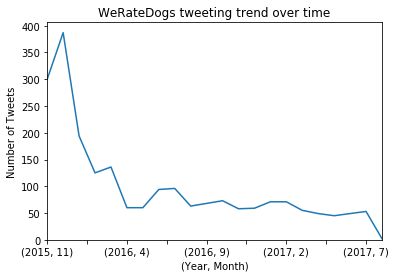

In [102]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

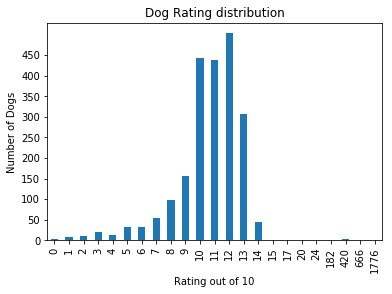

In [103]:
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

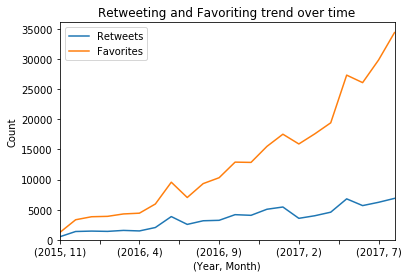

In [104]:

plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

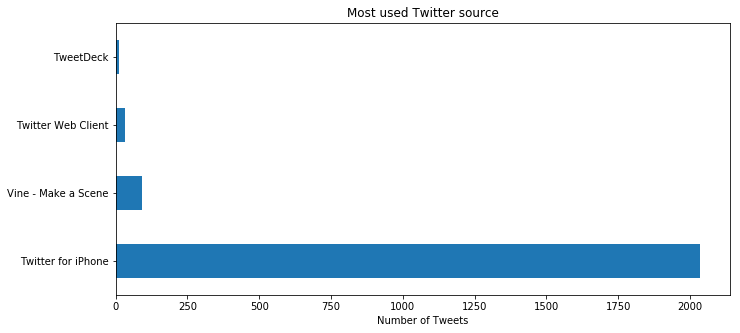

In [105]:
df['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

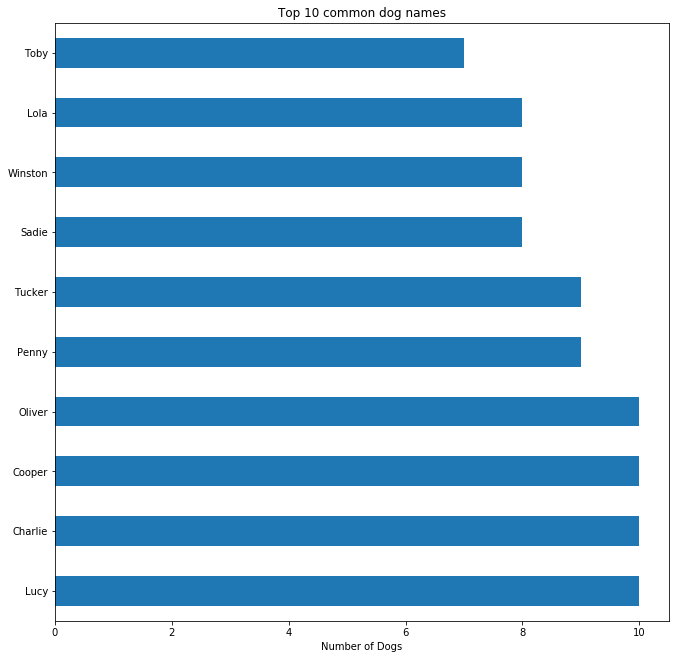

In [114]:
df.name.value_counts()[1:11].plot('barh', figsize=(11,11), title='Top 10 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')